In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt

In [25]:
batch_size = 32
img_height = 100
img_width = 100

In [26]:
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50, 50))
            images.append(img)
            labels.append(label)
    return images, labels

categories = {
    "down": 0,
    "neutral": 1,
    "up": 2,
    "other": 3
}


X = []
y = []

for category, label in categories.items():
    folder_path = os.path.join("../Generator/data/train/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# # Normalize the images to values between 0 and 1
X = X.astype("float32") / 255.0
X

array([[[[0.14117648, 0.8901961 , 0.14117648],
         [0.2784314 , 0.7764706 , 0.2784314 ],
         [0.2784314 , 0.77254903, 0.2901961 ],
         ...,
         [0.0627451 , 0.5568628 , 0.07843138],
         [0.07843138, 0.5568628 , 0.0627451 ],
         [0.14117648, 0.6156863 , 0.10588235]],

        [[0.2784314 , 0.77254903, 0.28627452],
         [0.5372549 , 0.5372549 , 0.5647059 ],
         [0.54901963, 0.5372549 , 0.58431375],
         ...,
         [0.08235294, 0.07450981, 0.08235294],
         [0.19215687, 0.16470589, 0.18039216],
         [0.19215687, 0.16862746, 0.19215687]],

        [[0.27450982, 0.77254903, 0.2784314 ],
         [0.54509807, 0.5411765 , 0.5686275 ],
         [0.54901963, 0.5372549 , 0.5686275 ],
         ...,
         [0.08627451, 0.09411765, 0.12156863],
         [0.13333334, 0.1254902 , 0.15294118],
         [0.14901961, 0.13333334, 0.16078432]],

        ...,

        [[0.25490198, 0.7490196 , 0.25490198],
         [0.53333336, 0.49019608, 0.5058824 ]

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = utils.to_categorical(y_train, len(categories))
y_test = utils.to_categorical(y_test, len(categories))

# Step 2: Create the deep learning model for gesture detection

def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Define the input shape and number of classes (gestures)
input_shape = X_train[0].shape
num_classes = len(categories)

# Create the model
model = create_model(input_shape, num_classes)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 128)        

In [28]:
# Train the model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Load and preprocess the test dataset

X_test = []
y_test = []

for category, label in categories.items():
    folder_path = os.path.join("../Generator/data/test/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.astype("float32") / 255.0
y_test = utils.to_categorical(y_test, len(categories))

print()
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/20
25/25 [==============================] - 2s 35ms/step - loss: 1.3474 - accuracy: 0.3150 - val_loss: 1.2738 - val_accuracy: 0.3571
Epoch 2/20
25/25 [==============================] - 1s 29ms/step - loss: 1.1669 - accuracy: 0.4635 - val_loss: 1.0496 - val_accuracy: 0.5867
Epoch 3/20
25/25 [==============================] - 1s 29ms/step - loss: 1.0328 - accuracy: 0.5237 - val_loss: 0.9909 - val_accuracy: 0.5408
Epoch 4/20
25/25 [==============================] - 1s 28ms/step - loss: 0.9356 - accuracy: 0.6108 - val_loss: 0.9104 - val_accuracy: 0.5816
Epoch 5/20
25/25 [==============================] - 1s 27ms/step - loss: 0.8115 - accuracy: 0.6569 - val_loss: 0.7872 - val_accuracy: 0.6480
Epoch 6/20
25/25 [==============================] - 1s 29ms/step - loss: 0.7253 - accuracy: 0.6965 - val_loss: 0.7850 - val_accuracy: 0.6684
Epoch 7/20
25/25 [==============================] - 1s 35ms/step - loss: 0.6673 - accuracy: 0.7145 - val_loss: 0.6690 - val_accuracy: 0.7347
Epoch 8/20
25

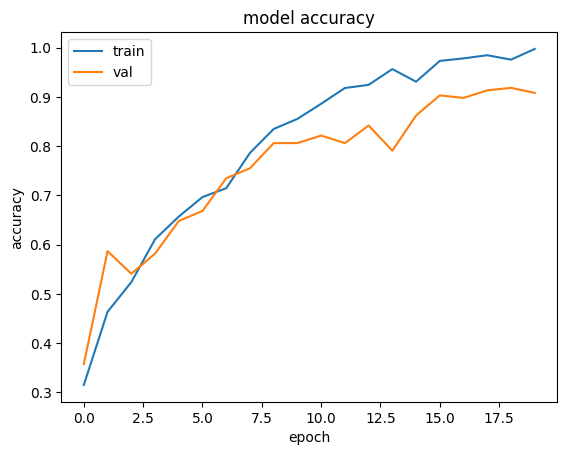

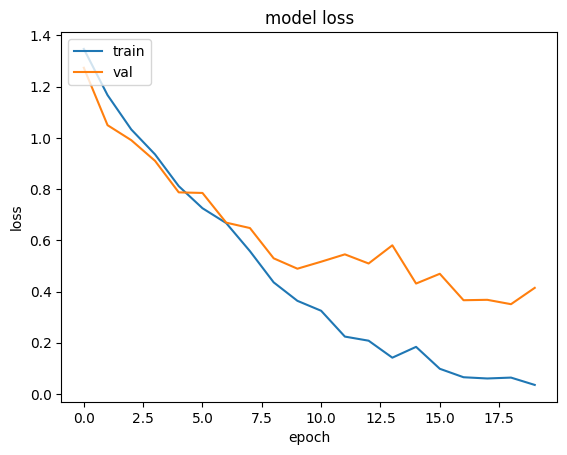

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
from tensorflow.keras.models import save_model, load_model

# Save the trained model
model.save("gesture_detection_model.h5")

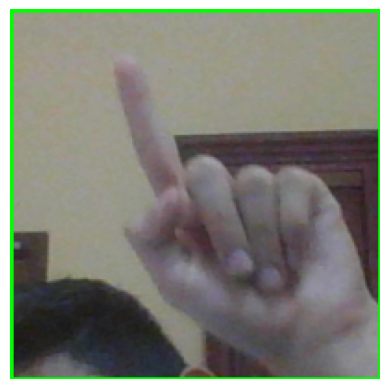

1/1 [==============================] - 0s 24ms/step
[[1.3434861e-05 2.4022184e-04 9.9974388e-01 2.4376288e-06]]
Predicted gesture label with the second largest probability: neutral


In [47]:
image_path = "../Generator/data/test/up/hand_50.png"
img = cv2.imread(image_path)

# Convert BGR to RGB for correct colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # Hide the axis ticks and labels
plt.show()

img = cv2.resize(img, (50, 50))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the image using the pre-trained model (assuming 'model' is defined)
predicted_probabilities = model.predict(img)
print(predicted_probabilities)

# Get the index of the second largest probability
second_largest_index = np.argsort(predicted_probabilities[0])[-2]

# Get the label from the categories dictionary (assuming 'categories' is defined)
gesture_label = None
for label, value in categories.items():
    if value == second_largest_index:
        gesture_label = label
        break

print("Predicted gesture label with the second largest probability:", gesture_label)


In [ ]:
# # Load the saved model
# loaded_model = load_model("gesture_detection_model.h5")